## Exercise 2: Border Following and Chain Codes

### Overview

This exercise focuses on extracting, analyzing, and representing the boundary of an object using three major techniques:

1. **Boundary Following Algorithm** – Manually implementing the contour-following method described in Section 11.1.1 of the textbook, applied to the "leaf.tif" image.
2. **Chain Code Representation** – Extracting the chain code from the boundary obtained, after performing boundary subsampling to reduce point density.
3. **Fourier Descriptors** – Applying the Fourier descriptor method described in Section 11.2.3 to represent the boundary in the frequency domain and reduce the number of descriptors while maintaining the recognizability of the shape.

### Constraints

- Use of built-in functions for boundary detection and chain code extraction is **not allowed**.
- All algorithms must be implemented manually based on the concepts provided in the textbook.


In [41]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

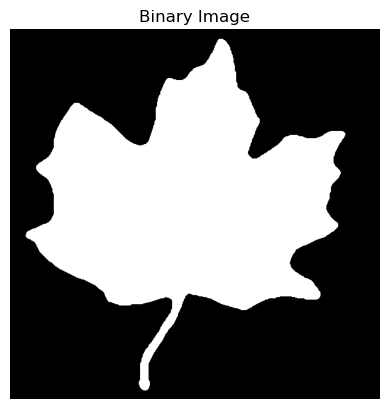

In [2]:
img = cv2.imread("/mnt/e/Term 4/HW/DIP-HW9/data/Images/leaf.tif", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

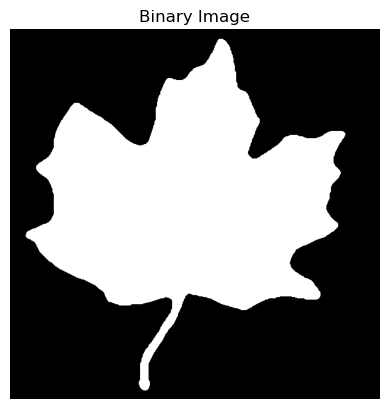

Utso threshold is: 0.0


In [3]:
# binarize the image
threshold_utso, binary = cv2.threshold(img, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(binary*255.0, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

print(f'Utso threshold is: {threshold_utso}')

In [4]:
# Pad the binary image to avoid index errors at the borders
binary = np.pad(binary, ((1, 1), (1, 1)), mode='constant')

In [5]:
# Define 8-connected neighbor directions (clockwise)
neighbors = [(-1, 0), (-1, 1), (0, 1), (1, 1),
             (1, 0), (1, -1), (0, -1), (-1, -1)]

In [6]:
# Define 8-connected neighbor directions (clockwise)
neighbors = [(-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1),
             (1, 0), (1, -1), (0, -1)]

In [7]:
# Find the top-left most foreground pixel (b0)
cords = np.argwhere(binary == 1)
cords

array([[ 16, 321],
       [ 16, 322],
       [ 16, 323],
       ...,
       [553, 207],
       [553, 208],
       [553, 209]])

In [8]:
b0 = cords[0]
b = b0.copy()
c = b + [0, -1]

In [9]:
boundary = [b.tolist()]
visited = set()
visited.add(tuple(b))

In [10]:
b0 = cords[0]
b = b0.copy()
c = b + [0, -1]
boundary = [b.tolist()]

neighbor_idx = 0

while True:
    found = False

    for i in range(len(neighbors)):
        idx = (neighbor_idx + i) % 8

        candidate = tuple(b_i + n_i for b_i, n_i in zip(b, neighbors[idx]))
        dx, dy = candidate

        if binary[dx, dy] == 1:
            idx_c = (idx -1) % 8 
            neighbor_idx = idx_c - 2
            c = tuple(b_i + n_i for b_i, n_i in zip(b, neighbors[idx_c]))
            b = candidate
            boundary.append(candidate)
            found = True
            break

    if not found or np.array_equal(b, b0):
        break

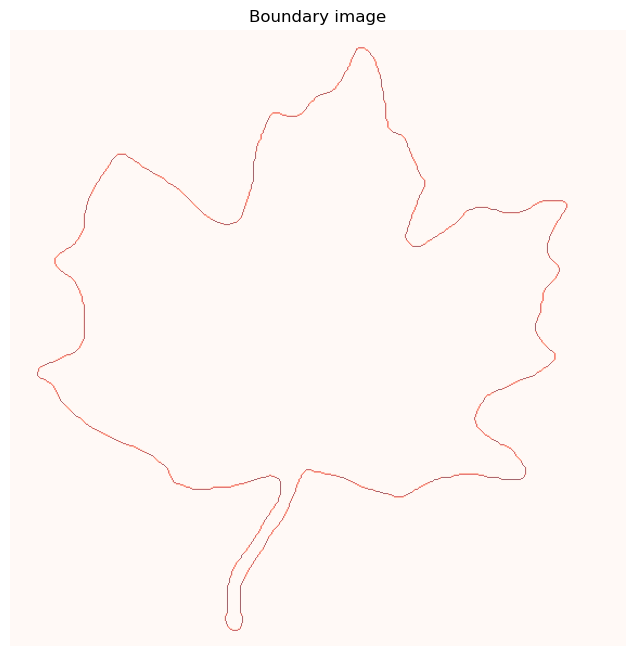

In [11]:
boundary_image = np.zeros_like(binary)

for _, y in enumerate(boundary):
    boundary_image[y[0], y[1]] = 1


plt.figure(figsize=(8,8))       
plt.imshow(boundary_image, cmap='Reds', alpha=0.6) 
plt.title("Boundary image")
plt.axis('off')
plt.show()

___

# Part b

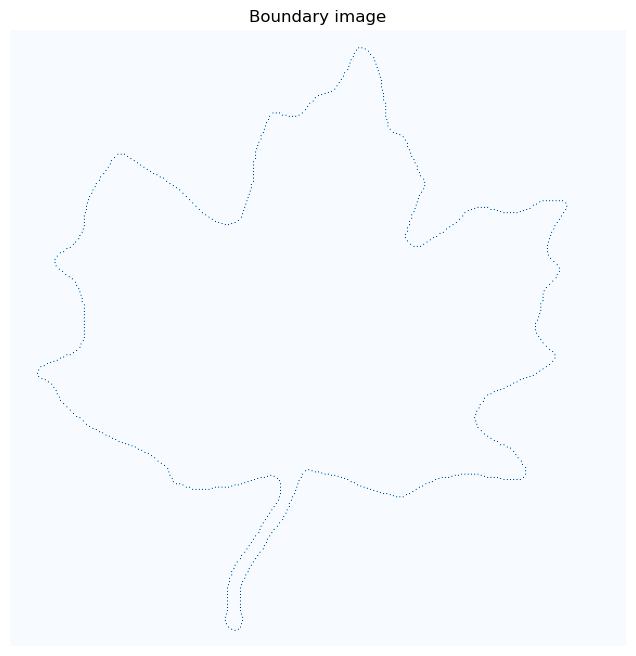

In [54]:
step = 3

resampled_image = boundary[::step]

boundary_image_resampled = np.zeros_like(binary)

for _, y in enumerate(resampled_image):
    boundary_image_resampled[y[0], y[1]] = 1


plt.figure(figsize=(8,8))       
plt.imshow(boundary_image_resampled, cmap='Blues', alpha=1) 
plt.title("Boundary image")
plt.axis('off')
plt.show()

In [61]:
boundaries_points = np.argwhere(boundary_image_resampled == 1)

In [ ]:
codes = []

for i in range(boundaries_points.shape[0]):
    current_point = tuple(boundaries_points[i])
    
    if i == (boundaries_points.shape[0] - 1):
        next_point = tuple(boundaries_points[0])
    else:
        next_point = tuple(boundaries_points[i+1])
    
    x1, y1 = current_point
    x2, y2 = next_point

    dx = x2 - x1
    dy = y2 - y1
    
    angle_rad = math.atan2(dx, dy)
    angle_deg = math.degrees(angle_rad)
    angle = (angle_deg + 360) % 360

    #  code = int((angle + 22.5) // 45) % 8    

    if 337.5 <= angle or angle < 22.5:
        code = 0  
    elif 22.5 <= angle < 67.5:
        code = 7  
    elif 67.5 <= angle < 112.5:
        code = 6  
    elif 112.5 <= angle < 157.5:
        code = 5  
    elif 157.5 <= angle < 202.5:
        code = 4  
    elif 202.5 <= angle < 247.5:
        code = 3  
    elif 247.5 <= angle < 292.5:
        code = 2  
    elif 292.5 <= angle < 337.5:
        code = 1  
    
    codes.append(code)

codes


[0,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 0,
 4,
 5,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 4,
 4,
 4,
 0,
 0,
 4,
 4,
 0,
 0,
 4,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 0,
 4,
 4,
 4,
 0,
 0,
 4,


# Part c

/home/mohammadjavad/anaconda3/envs/py312/lib/python3.12/site-packages/skimage/exposure/exposure.py:306: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, bin_edges = np.histogram(image, bins=bins, range=hist_range)


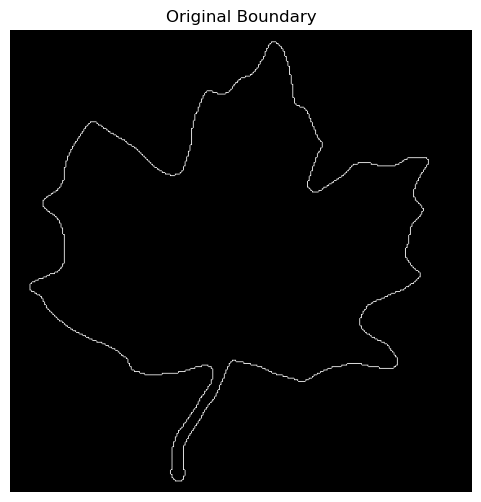

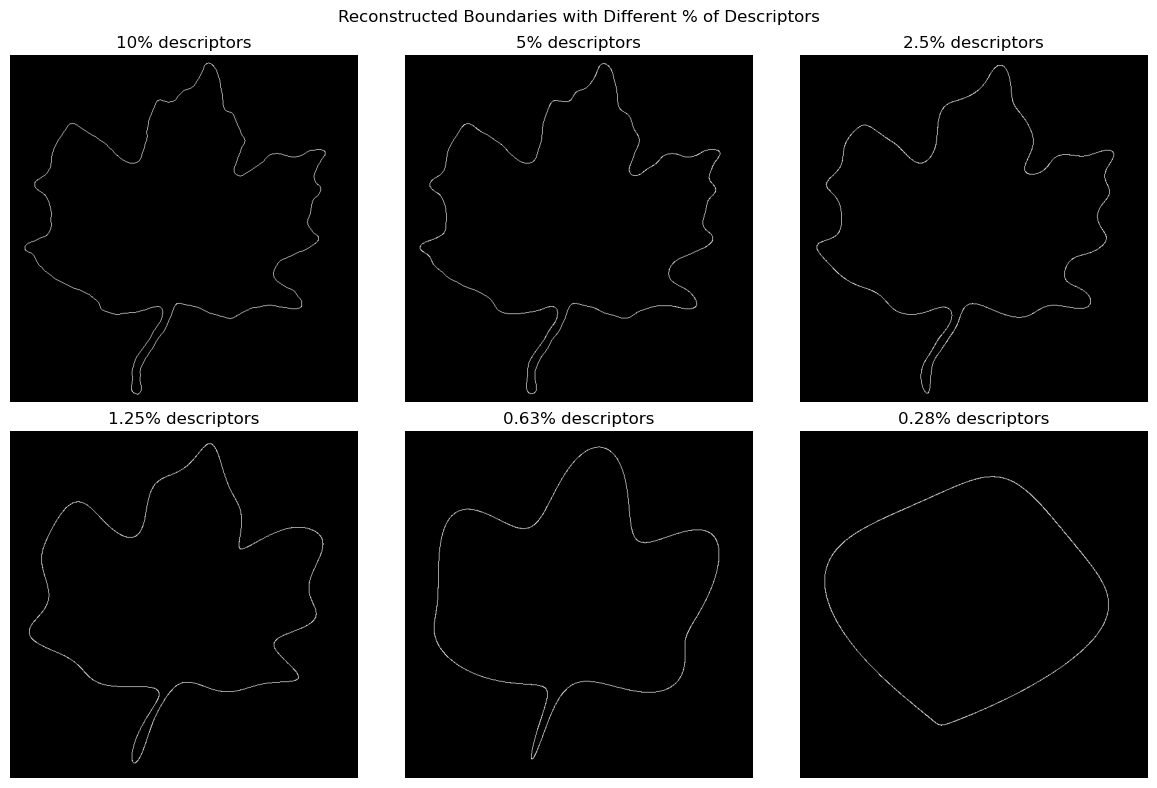

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import threshold_otsu
from skimage.measure import find_contours

def my_fourierdescriptor(boundary):
    np_pts = boundary.shape[0]
    if np_pts % 2 != 0:
        boundary = np.vstack([boundary, boundary[-1]])
        np_pts += 1

    x = np.arange(np_pts)
    m = (-1) ** x
    boundary[:, 0] *= m
    boundary[:, 1] *= m

    complex_boundary = boundary[:, 0] + 1j * boundary[:, 1]
    fft_output = np.fft.fft(complex_boundary)
    return fft_output

def my_inversefourierdescriptor(z, nd):
    np_pts = len(z)
    x = np.arange(np_pts)
    m = (-1) ** x

    d = int((np_pts - nd) / 2)
    z_reduced = z.copy()
    z_reduced[:d] = 0
    z_reduced[-d:] = 0

    zz = np.fft.ifft(z_reduced)
    s = np.zeros((np_pts, 2))
    s[:, 0] = m * zz.real
    s[:, 1] = m * zz.imag
    return s

def boundary2img(shape, boundary):
    img = np.zeros(shape, dtype=np.uint8)
    for point in boundary:
        y, x = int(round(point[0])), int(round(point[1]))
        if 0 <= y < shape[0] and 0 <= x < shape[1]:
            img[y, x] = 255
    return img

# --- Main Script ---
# Load and preprocess image
img = io.imread('/mnt/e/Term 4/HW/HW9/Images/leaf.tif')
if len(img.shape) == 3:
    img = color.rgb2gray(img)
thresh = threshold_otsu(img)
binary = img > thresh

# Get boundary
contours = find_contours(binary, 0.5)
boundary = contours[0]
boundary = np.array(boundary)

# Display original boundary
plt.figure(figsize=(6, 6))
plt.imshow(boundary2img(binary.shape, boundary), cmap='gray')
plt.title('Original Boundary')
plt.axis('off')

# Compute Fourier Descriptor
fd = my_fourierdescriptor(boundary)
total_points = len(fd)

# Percentages to test
percentages = [10, 5, 2.5, 1.25, 0.63, 0.28]
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Reconstructed Boundaries with Different % of Descriptors")

for i, p in enumerate(percentages):
    num_descriptors = int(total_points * p / 100)
    reconstructed = my_inversefourierdescriptor(fd, num_descriptors)
    recon_img = boundary2img(binary.shape, reconstructed)

    ax = axs[i // 3, i % 3]
    ax.imshow(recon_img, cmap='gray')
    ax.set_title(f"{p}% descriptors")
    ax.axis('off')

plt.tight_layout()
plt.show()
